# Probabilistic Time Series Analysis

## Week 2: Time Series Basics & AR(I)MA Models

---

## Instructions

You will need the following Python packages. Install them either with `conda install -c conda-forge` if you use the Anaconda environment (preferred to avoid complications if you're starting from scratch) or `pip install`.

    jupyter
    numpy
    scipy
    pandas
    statsmodels
    matplotlib

Python 2.7 and 3 should both be fine for these notebooks; let me know if you have compatibility issues.

Places where you are supposed to fill in code are marked

    #
    # TODO: some instructions
    # 
    
The rest of the code we will run and discuss if time permits, otherwise try it out at home and try to answer the questions mentioned in the text boxes for yourself.

### Please turn in the code before 09/19/2018 5:20pm. 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to other questions in the text blocks, just think them over.

### Title your submission file `lab2-student-[YOUR NET ID].ipynb`.

---

## Setup

In [1]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
from statsmodels.graphics.api import qqplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Plotting function for CCF, analogous to statsmodels.graphics.tsaplots.plot_acf
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(
        ax, title, ccf_val, confint, lags, irregular, use_vlines, dict(), **kwargs)
    return fig

## Part I: Autocorrelation Function

### White Noise 

$$w_t \sim N(0, \sigma^2)$$

- Set $\sigma$ = 1, sample n = 500 points from the process above.
- Plot the white noise.
- Plot the sample ACF with lag = 20.
- Calculate the analytical ACF and compare it with the sample ACF.
- Change n to 50, 100, 1000, 2000. Compare the ACF plots. What do you notice? What causes the differences?

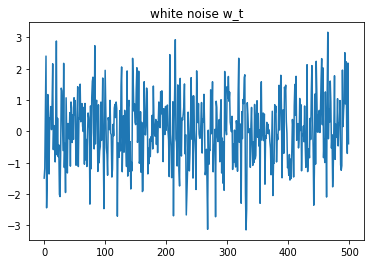

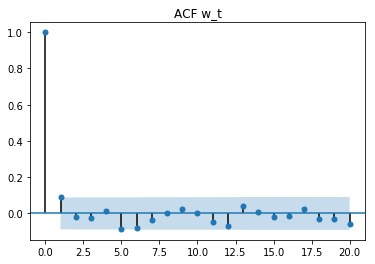

In [2]:
n = 500
mean = 0
std = 1 
lag = 20

# Create white noise
w_t = np.random.normal(mean, std, size=n)

# Plot white noise
plt.plot(w_t)
plt.title("white noise w_t")
plt.show()

# Calculate ACF
acf_val = acf(x=w_t, nlags=lag)
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

### Moving Average 

$$v_t = \frac{1}{3}(w_{t} + w_{t+1} + w_{t+2})$$

- Sample n+2 white noise from N(0,1)
- Add code to compute the moving average $v_t$.
- Plot both $w_t$ and $v_t$ and compare the two time series.
- Plot the sample ACF of $v_t$ and compare it with the analytical ACF.


/usr/local/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:476: RuntimeWarning: invalid value encountered in divide
  acf = avf[:nlags + 1] / avf[0]


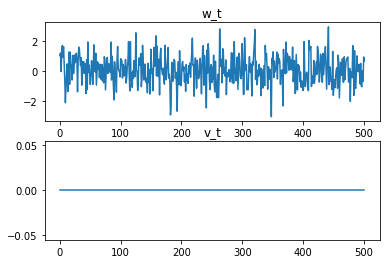

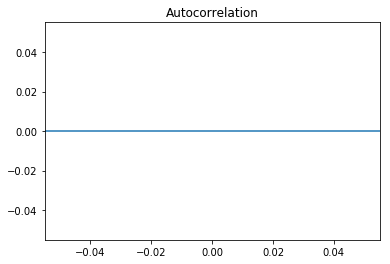

In [3]:
n = 500
mean = 0
std = 1 
lag = 20

# Create white noise
w_t = np.random.normal(mean, std, size=n+2)

#
# TODO: Replace the template code below. This part will be graded.
#
# Create moving average
v_t = np.zeros(len(w_t))  

# Plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")

# Plot moving average
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# Calculate ACF
acf_val = statsmodels.tsa.stattools.acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag)
plt.show()

## Part II: Cross-Correlation Function

### Synthetic Data: Signal with Noise

$$x_t \sim N(0, \sigma_x^2) $$

$$ y_t = 2x_{t-5} + w_t, w_t \sim N(0, \sigma_x^2)$$

- In this example, we created two processes with a lag of 5.
- Plot the both samples to verify the lag.
- Plot the sample ACF for both samples.
- Plot the sample CCF. What information can you conclude from the CCF plot?

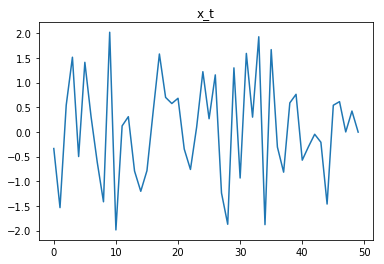

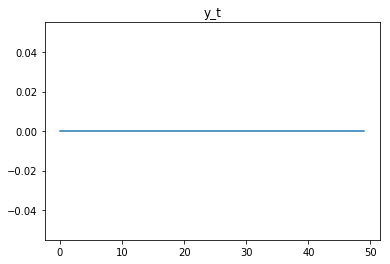

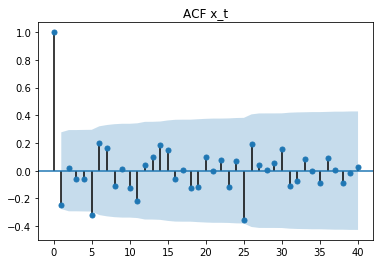

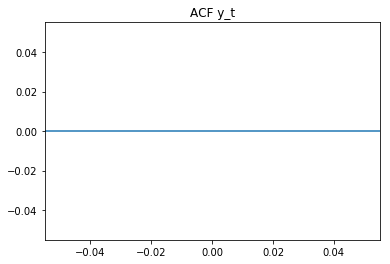

/usr/local/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:686: RuntimeWarning: invalid value encountered in divide
  return cvf / (np.std(x) * np.std(y))


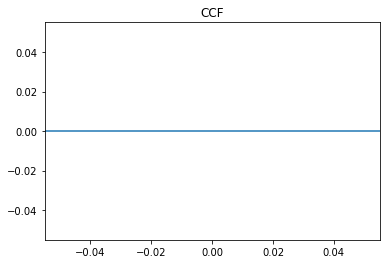

In [4]:
n = 50
mean = 0
std = 1 
lag=40
true_h = 5

x_t = np.random.normal(mean, std, size=n+5)

#
# TODO: Replace the template code below. This part will be graded.
#
y_t = np.zeros(n)
x_t = x_t[:n]

# Plot the original data
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# Plot ACF
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

# Plot CCF
ccf_val = ccf(y_t, x_t)
plot_ccf(x=x_t, y=y_t, title="CCF", lags=10)
plt.show()

### Southern Oscillation Index (SOI) v.s. Recruitment (Rec)

- Replicate the procedure in the previous section.
- What information can you tell from the CCF plot?
- In this example, our procedure is actually flawed. Unlike the previous example, we cannot tell if the cross-correlation estimate is significantly different from zero by looking at the CCF. Why is that? What can we do to address this issue?

In [5]:
soi = np.array(pd.read_csv("../../data/soi.csv")["x"])
rec = np.array(pd.read_csv("../../data/rec.csv")["x"])

#
# TODO: Replace the template code below. This part will be graded.
#

# Plot data

# Plot ACF

# Plot CCF


## Part IV: Parameter Redundancy and MA Non-Uniqueness

$$x_t = 0.5 x_{t-1} - 0.5 w_{t-1} + w_t$$

$$w_t\sim N(0, \sigma^2)$$

Are $x_t$ and $w_t$ the same?

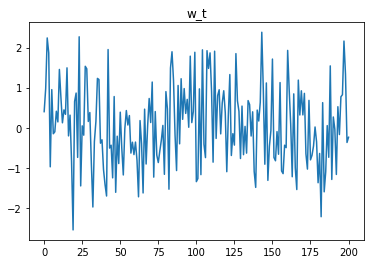

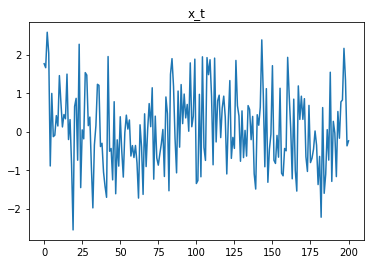

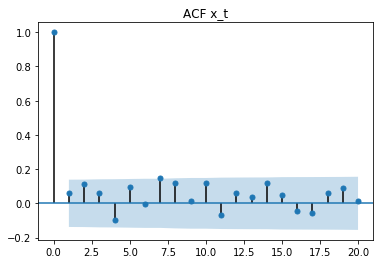

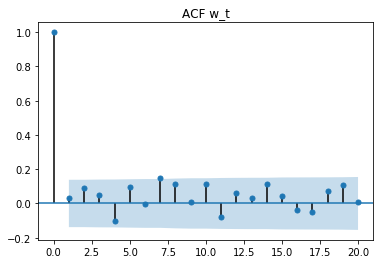

In [6]:
n = 200
mean = 0
std = 1 
lag = 20

# Create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, std, size=n+1) 
for i in range(1, n+1):
    x_t.append(0.5 * x_t[i-1] - 0.5 * w_t[i-1] + w_t[i] )

# Plot x_t & w_t
plt.plot(w_t)
plt.title("w_t")
plt.show()
plt.plot(x_t)
plt.title("x_t")
plt.show()

# ACF
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

Another example:

$$x_t = w_t + \frac{1}{5} w_{t-1}, w_t \sim N(0, 25)$$

$$y_t = v_t + 5 v_{t-1}, v_t \sim N(0,1)$$

Are $x_t$ and $y_t$ the same?

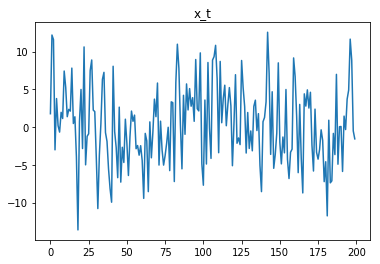

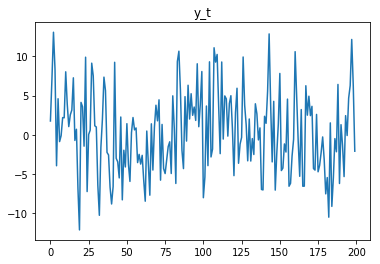

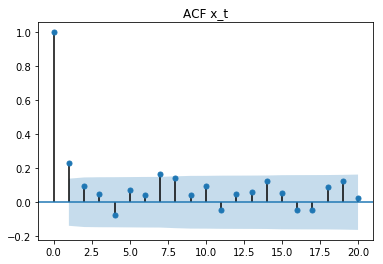

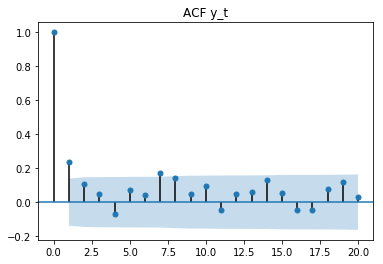

In [7]:
n = 200
mean = 0
lag = 20

# Create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, 5, size=n+1) 
np.random.seed(0)
y_t = list(np.random.normal(mean, std, size=1))
v_t = np.random.normal(mean, 1, size=n+2) 
for i in range(2, n+1):
    x_t.append(w_t[i] + 0.2 * w_t[i-1])
    y_t.append(v_t[i] + 5 * v_t[i-1])

# Plot x_t & y_t
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# ACF
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

## Part V: AR Modeling

In this example, we will fit an AR(2) and an AR(3) using the SunActivity data which denotes the number of sunspots for each year.

Wikipedia for sunspots: https://en.wikipedia.org/wiki/Sunspot

The code in this section is selected from the tutorial specified in the reference section.

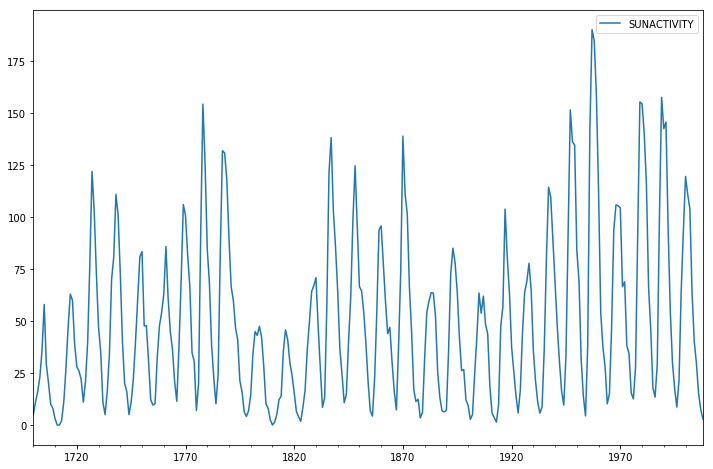

In [8]:
dta = sm.datasets.sunspots.load_pandas().data
dta
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8))
plt.show()

### ACF & PACF

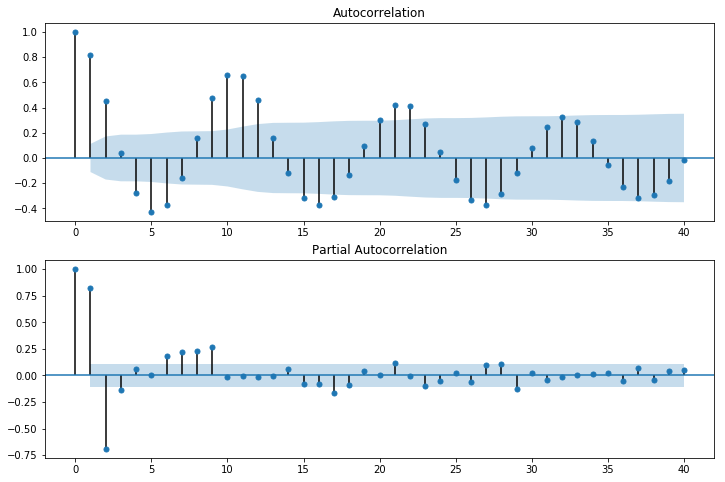

In [9]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

### Fit AR Models

In [10]:
print 'AR(2):'
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

print ''

print 'AR(3):'
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)

AR(2):
const                49.659542
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64

/usr/local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)




AR(3):
const                49.749936
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [11]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047417
1991-12-31    140.993002
1992-12-31     94.859112
1993-12-31     46.860896
1994-12-31     11.242577
1995-12-31     -4.721303
1996-12-31     -1.166920
1997-12-31     16.185687
1998-12-31     39.021884
1999-12-31     59.449878
2000-12-31     72.170152
2001-12-31     75.376793
2002-12-31     70.436464
2003-12-31     60.731586
2004-12-31     50.201791
2005-12-31     42.076018
2006-12-31     38.114277
2007-12-31     38.454635
2008-12-31     41.963810
2009-12-31     46.869285
2010-12-31     51.423261
2011-12-31     54.399720
2012-12-31     55.321692
Freq: A-DEC, dtype: float64


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


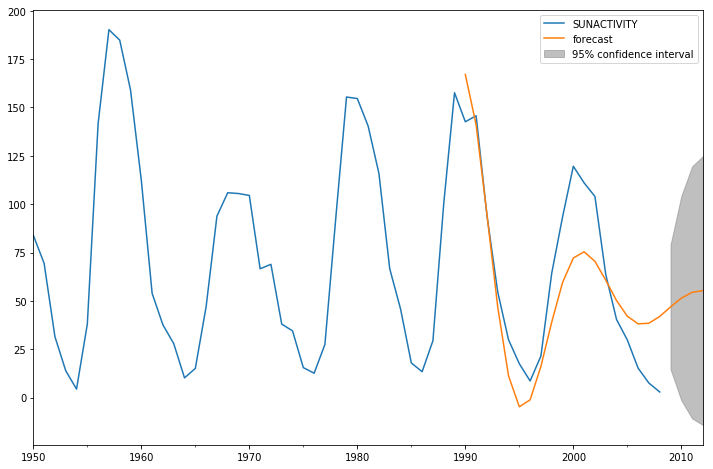

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)
plt.show()

## Part VI: AR Parameter Estimation

`statsmodels.tsa.arima_model.ARMA.predict()` method fits the ARMA(p,q) model using exact maximum likelihood computed with Kalman filtering, which we will learn about later.

For now, we will implement two other moments-based methods to estimate the parameters:

- Direct solution of the Yule-Walker equations

- Durbin-Levinson algorithm

We will test our implementation on AR(p) models against the estimated parameters from statsmodels API.

### Create an AR(2) process 

$$ x_t = 0.6 x_{t-1} - 0.75 x_{t-2} + w_t $$

Look at the PACF and think about how this should inform the number of components we use in an AR model.

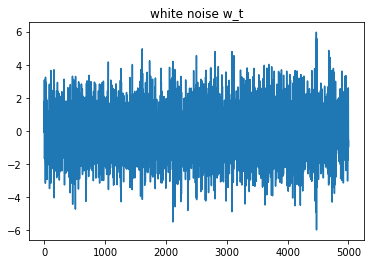

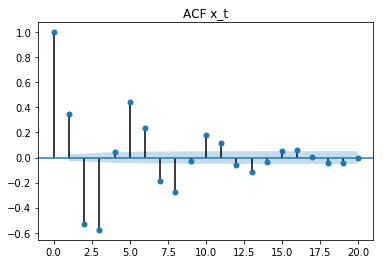

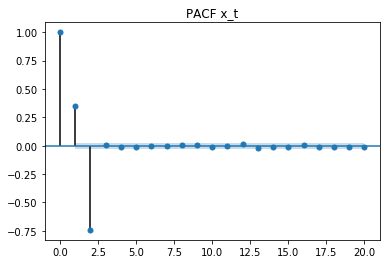

In [13]:
n = 5000
mean = 0
std = 1 
lag = 20

# Create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=2))
w_t = np.random.normal(mean, std, size=n)
for i in range(2, n+2):
    x_t.append(0.6 * x_t[i-1] - 0.75 * x_t[i-2] + w_t[i-2])
    
# Plot white noise
plt.plot(x_t)
plt.title("white noise w_t")
plt.show()

# Calculate ACF
acf_val = acf(x=x_t, nlags=lag)
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_pacf(x=x_t, lags=lag, title="PACF x_t")
plt.show()

In [14]:
# Use statsmodel to fit this series
arma_mod20 = sm.tsa.ARMA(x_t, (2,0)).fit(disp=False)
print(arma_mod20.params)

[-0.01315807  0.60583961 -0.74131016]


In [15]:
#
# TODO: Replace the template code below. This part will be graded.
#

def inverse_yule_walker_ar(x, p):
    """
    Implementation for a direct inverse solution on Yule-Walker equations
    @param x: the dataset, a numpy 1D array
    @param p: lags, p in AR(p)
    @return: a 1-D numpy array phi of shape p. phi[i] = parameter for x_{t-i} in a AR(p) model
    """
    return np.zeros(p)

In [16]:
print(inverse_yule_walker_ar(x_t, 2))
print(arma_mod20.params[1:])

[0. 0.]
[ 0.60583961 -0.74131016]


In [17]:
#
# TODO: Replace the template code below. This part will be graded.
#

def durbin_levinson_ar(x, p):
    """
    Implementation for Durbin-Levinson Algorithm
    @param x: the dataset, a numpy 1D array
    @param p: lags, p in AR(p)
    @return: a 2D numpy matrix phi with shape p * p. phi[i,j]=parameter for x_{t-j} in a AR(i) model.
    """
    return np.zeros((p, p))

In [18]:
print(durbin_levinson_ar(x_t, 2)[1])
print(arma_mod20.params[1:])

[0. 0.]
[ 0.60583961 -0.74131016]


### References

Autoregressive Moving Average (ARMA): Sunspots data, http://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html